<a href="https://colab.research.google.com/github/lokeshkumarn/Notebooks/blob/master/MachineHack_MLDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

In [0]:
df_train = pd.read_csv('final_train_data.csv')
df_test = pd.read_csv('final_test_data.csv')

In [8]:
df_train.head()

,Country Name,Country Code,Year,Balance,Inflation,GDP,Exports,Trade
0,Senegal,SEN,1983,-3.043829e+08,9.274213,-5.326393,6.180000e+08,59.224298
1,Togo,TGO,2009,-1.766692e+08,1.855275,3.510297,9.030260e+08,76.242542
2,Pakistan,PAK,1992,-1.876092e+09,10.057085,7.705898,7.351000e+09,34.489440
3,Nepal,NPL,1988,-2.714506e+08,11.815310,7.696809,1.900000e+08,24.978422
4,Malta,MLT,2016,7.269132e+08,1.604548,5.516617,3.017299e+09,83.781471


In [29]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4506 entries, 0 to 4505
Data columns (total 8 columns):
Country Name    4506 non-null object
Country Code    4506 non-null object
Year            4506 non-null int64
Balance         4506 non-null float64
Inflation       4261 non-null float64
GDP             4262 non-null float64
Exports         4490 non-null float64
Trade           4304 non-null float64
dtypes: float64(5), int64(1), object(2)
memory usage: 281.7+ KB


In [35]:
len(df_train['Country Name'].unique())

150

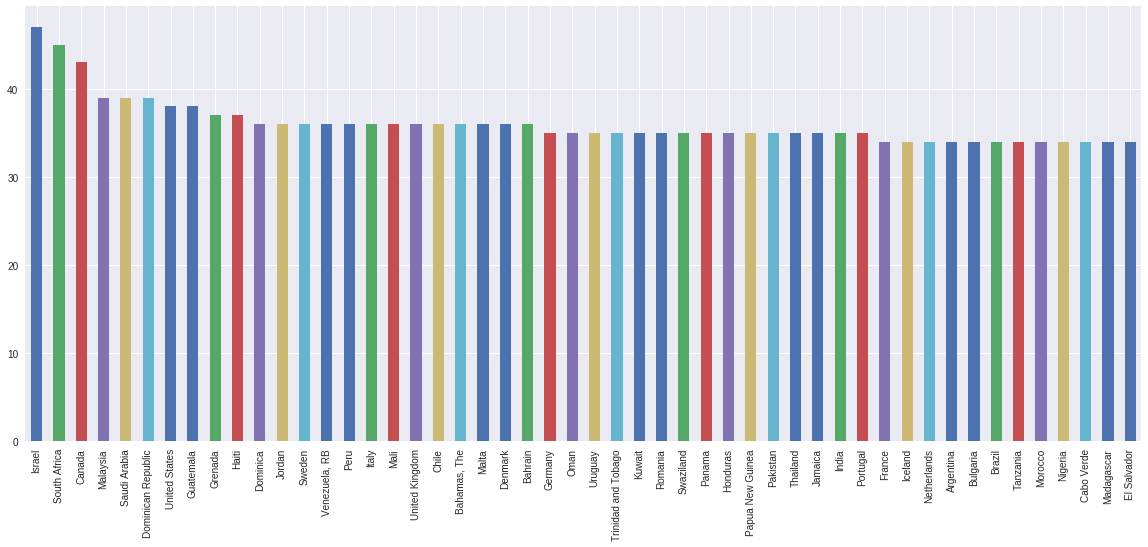

In [37]:
df_train['Country Name'].value_counts()[:50].plot(kind='bar',figsize=(20,8))

Mean balance: -513203070.70703393
Median balance: -160328728.3
STD balance: 35610068572.69368


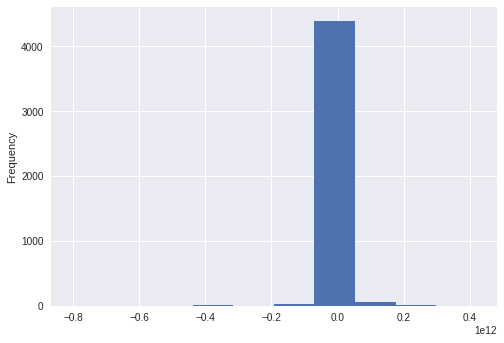

In [59]:
print('Mean balance:',df_train['Balance'].mean())
print('Median balance:',df_train['Balance'].median())
print('STD balance:',df_train['Balance'].std())
df_train['Balance'].plot(kind='hist')

Mean Inflation: 31.61346420512509
Median Inflation: 6.184351239
STD Inflation: 353.8179652622975


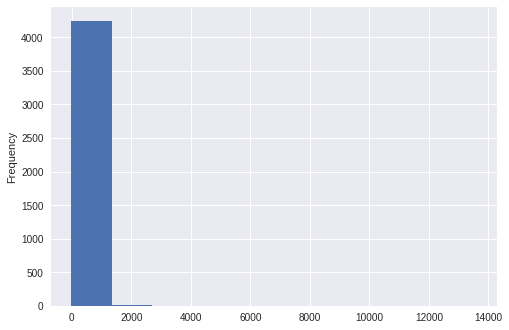

In [57]:
print('Mean Inflation:',df_train['Inflation'].mean())
print('Median Inflation:',df_train['Inflation'].median())
print('STD Inflation:',df_train['Inflation'].std())
df_train['Inflation'].plot(kind='hist')

Mean GDP: 3.6412244918801027
Median GDP: 3.799969259
STD GDP: 4.850977550143861


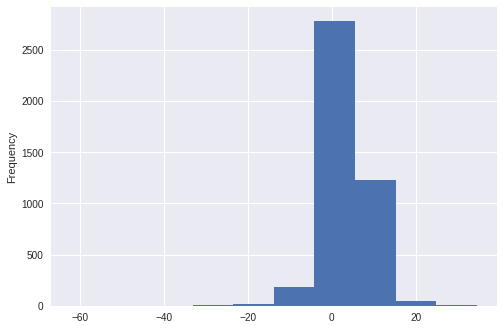

In [60]:
print('Mean GDP:',df_train['GDP'].mean())
print('Median GDP:',df_train['GDP'].median())
print('STD GDP:',df_train['GDP'].std())
df_train['GDP'].plot(kind='hist')

Label Encoding

In [0]:
from sklearn.preprocessing import LabelEncoder

In [69]:
country_name_encoder = LabelEncoder()
country_name_encoder.fit(df_train['Country Name'])

LabelEncoder()

In [70]:
country_name_encoder.transform(df_train['Country Name'])

array([115, 135, 102, ..., 112,  52,  94])

In [71]:
len(country_name_encoder.transform(df_train['Country Name']))

4506

In [0]:
df_train['CountryId'] = country_name_encoder.transform(df_train['Country Name'])

In [0]:
df_train = df_train[['CountryId','Year','Exports','Inflation','GDP','Trade','Balance']]

In [0]:
df_train = df_train.sort_values(by=['CountryId','Year']).reset_index(drop=True)

In [85]:
df_train[df_train['CountryId']==0]

,CountryId,Year,Exports,Inflation,GDP,Trade,Balance
0,0,1981,NaN,-2.177360,5.745635,NaN,4.500000e+07
1,0,1982,NaN,-0.017694,2.948597,NaN,-6.680000e+07
2,0,1983,NaN,-0.016747,1.104938,NaN,-3.830000e+07
3,0,1984,NaN,-0.028354,-1.251597,NaN,-2.810000e+07
4,0,1985,NaN,0.351198,1.780644,NaN,-3.640000e+07
5,0,1986,NaN,-2.378001,5.637243,NaN,-3.200000e+06
6,0,1987,NaN,0.000029,-0.787843,NaN,5.200000e+06
7,0,1988,NaN,0.000001,-1.420040,NaN,-2.710000e+07
8,0,1990,2.300000e+08,-0.468707,-9.575640,29.025160,-1.183000e+08
9,0,1995,2.020000e+08,5.573307,13.300000,37.760378,-1.150000e+07


Impute the missing values

In [0]:
from sklearn.preprocessing import Imputer

In [68]:
df_train.isnull().sum()

Country Name      0
Country Code      0
Year              0
Balance           0
Inflation       245
GDP             244
Exports          16
Trade           202
CountryId         0
dtype: int64

In [20]:
df_train[df_train['Inflation'].isnull()]['Country Name'].value_counts()

Libya                    23
Maldives                 20
Sao Tome and Principe    19
Haiti                    19
Romania                  15
Aruba                    15
Barbados                 14
Poland                   12
Solomon Islands          11
Tanzania                 11
Tonga                     9
Hungary                   9
Bahrain                   6
Samoa                     6
Ethiopia                  4
Estonia                   4
Lithuania                 3
Syrian Arab Republic      3
Croatia                   3
Slovenia                  3
Jordan                    3
Latvia                    3
Cabo Verde                3
Cambodia                  2
Switzerland               2
Dominica                  2
Kuwait                    2
Moldova                   2
Uganda                    2
Venezuela, RB             2
Bulgaria                  1
Angola                    1
Antigua and Barbuda       1
Oman                      1
Israel                    1
Grenada             

In [22]:
df_train[df_train['Country Name']=='Libya'].sort_values(by=['Year'])

,Country Name,Country Code,Year,Balance,Inflation,GDP,Exports,Trade
41,Libya,LBY,1977,2.159087e+09,NaN,NaN,1.141090e+10,NaN
2629,Libya,LBY,1980,8.213794e+09,NaN,NaN,2.191000e+10,NaN
1735,Libya,LBY,1981,-3.963496e+09,NaN,NaN,1.557100e+10,NaN
1007,Libya,LBY,1982,-1.559518e+09,NaN,NaN,1.320300e+10,NaN
3959,Libya,LBY,1983,-1.643287e+09,NaN,NaN,1.221600e+10,NaN
3851,Libya,LBY,1984,-1.456496e+09,NaN,NaN,1.114800e+10,NaN
506,Libya,LBY,1985,1.906415e+09,NaN,NaN,1.231400e+10,NaN
3093,Libya,LBY,1986,-1.553603e+08,NaN,NaN,8.215000e+09,NaN
3659,Libya,LBY,1987,-1.035927e+09,NaN,NaN,8.043000e+09,NaN
2490,Libya,LBY,1988,-1.826318e+09,NaN,NaN,6.673000e+09,NaN


In [28]:
df_train[df_train['Country Name']=='Libya']['Inflation'].mean()

10.6869210674